In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import glob
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

2025-02-05 13:10:59.866395: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
'''
        Each file contains nine columns and a different number of rows depending on the test length.
        
        1st column is the acceleration data in the X axis measured by the sensor ADXL345.
        2nd column is the acceleration data in the Y axis measured by the sensor ADXL345.
        3rd column is the acceleration data in the Z axis measured by the sensor ADXL345.

        4th column is the rotation data in the X axis measured by the sensor ITG3200.
        5th column is the rotation data in the Y axis measured by the sensor ITG3200.
        6th column is the rotation data in the Z axis measured by the sensor ITG3200.

        7th column is the acceleration data in the X axis measured by the sensor MMA8451Q.
        8th column is the acceleration data in the Y axis measured by the sensor MMA8451Q.
        9th column is the acceleration data in the Z axis measured by the sensor MMA8451Q.
        
        Data are in bits with the following characteristics:

        ADXL345:
        Resolution: 13 bits
        Range: +-16g

        ITG3200
        Resolution: 16 bits
        Range: +-2000°/s

        MMA8451Q:
        Resolution: 14 bits
        Range: +-8g
'''

In [4]:
datapath = "../../../data/SisFall.csv"

df = pd.read_csv(datapath, index_col=0)
df.head(10)

,ADXL_x,ADXL_y,ADXL_z,ITG_x,ITG_y,ITG_z,MMA_x,MMA_y,MMA_z,subject,activity,trial
NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,SA01,D01,R01
0.0,17.0,-179.0,-99.0,-18.0,-504.0,-352.0,76.0,-697.0,-279.0,SA01,D01,R01
1.0,15.0,-174.0,-90.0,-53.0,-568.0,-306.0,48.0,-675.0,-254.0,SA01,D01,R01
2.0,1.0,-176.0,-81.0,-84.0,-613.0,-271.0,-2.0,-668.0,-221.0,SA01,D01,R01
3.0,-10.0,-180.0,-77.0,-104.0,-647.0,-227.0,-34.0,-697.0,-175.0,SA01,D01,R01
4.0,-21.0,-191.0,-63.0,-128.0,-675.0,-191.0,-74.0,-741.0,-133.0,SA01,D01,R01
5.0,-37.0,-225.0,-59.0,-146.0,-700.0,-159.0,-110.0,-840.0,-103.0,SA01,D01,R01
6.0,-36.0,-243.0,-46.0,-166.0,-722.0,-131.0,-147.0,-948.0,-75.0,SA01,D01,R01
7.0,-44.0,-271.0,-38.0,-190.0,-738.0,-107.0,-171.0,-1073.0,-38.0,SA01,D01,R01
8.0,-51.0,-312.0,-33.0,-210.0,-752.0,-90.0,-200.0,-1191.0,3.0,SA01,D01,R01


In [5]:
print (df.columns)
print (set(df['subject']))
features = df.copy()

dnum = 200
fnum = 365

Index(['ADXL_x', 'ADXL_y', 'ADXL_z', 'ITG_x', 'ITG_y', 'ITG_z', 'MMA_x',
       'MMA_y', 'MMA_z', 'subject', 'activity', 'trial'],
      dtype='object')
{'SA18', 'SA15', 'SA14', 'SA02', 'SE05', 'SA07', 'SA23', 'SE01', 'SA16', 'SA05', 'SA22', 'SA04', 'SE12', 'SE10', 'SA13', 'SE07', 'SE09', 'SE08', 'SA03', 'SA06', 'SE15', 'SA17', 'SA10', 'SA21', 'SA08', 'SE11', 'SE04', 'SA09', 'SA19', 'SE13', 'SE03', 'SA12', 'SE02', 'SE06', 'SA01', 'SA20', 'SE14', 'SA11'}


In [6]:
D01 = features[features['activity']=='D01'].head(dnum).copy()
D02 = features[features['activity']=='D02'].head(dnum).copy()
D03 = features[features['activity']=='D03'].head(dnum).copy()
D04 = features[features['activity']=='D04'].head(dnum).copy()
D05 = features[features['activity']=='D05'].head(dnum).copy()
D06 = features[features['activity']=='D06'].head(dnum).copy()
D07 = features[features['activity']=='D07'].head(dnum).copy()
D08 = features[features['activity']=='D08'].head(dnum).copy()
D09 = features[features['activity']=='D09'].head(dnum).copy()
D10 = features[features['activity']=='D10'].head(dnum).copy()
D11 = features[features['activity']=='D11'].head(dnum).copy()
D12 = features[features['activity']=='D12'].head(dnum).copy()
D13 = features[features['activity']=='D13'].head(dnum).copy()
D14 = features[features['activity']=='D14'].head(dnum).copy()
D15 = features[features['activity']=='D15'].head(dnum).copy()
D16 = features[features['activity']=='D16'].head(dnum).copy()
D17 = features[features['activity']=='D17'].head(dnum).copy()
D18 = features[features['activity']=='D18'].head(dnum).copy()
D19 = features[features['activity']=='D19'].head(dnum).copy()

In [7]:
F01 = features[features['activity']=='F01'].head(fnum).copy()
F02 = features[features['activity']=='F02'].head(fnum).copy()
F03 = features[features['activity']=='F03'].head(fnum).copy()
F04 = features[features['activity']=='F04'].head(fnum).copy()
F05 = features[features['activity']=='F05'].head(fnum).copy()
F06 = features[features['activity']=='F06'].head(fnum).copy()
F07 = features[features['activity']=='F07'].head(fnum).copy()
F08 = features[features['activity']=='F08'].head(fnum).copy()
F09 = features[features['activity']=='F09'].head(fnum).copy()
F10 = features[features['activity']=='F10'].head(fnum).copy()
F11 = features[features['activity']=='F11'].head(fnum).copy()
F12 = features[features['activity']=='F12'].head(fnum).copy()
F13 = features[features['activity']=='F13'].head(fnum).copy()
F14 = features[features['activity']=='F14'].head(fnum).copy()
F15 = features[features['activity']=='F15'].head(fnum).copy()

In [8]:
df = pd.DataFrame()
df = pd.concat([df, F01, F02, F03, F04, F05, F06, F07, F08, F09, F10, F11, F12, F13, F14, F15])
df = pd.concat([df, D01, D02, D03, D04, D05, D06, D07, D08, D09, D10, D11, D15, D16, D17, D18, D19])

In [9]:
df['activity'].value_counts()

activity
F01    365
F09    365
F02    365
F15    365
F14    365
F13    365
F11    365
F10    365
F12    365
F08    365
F07    365
F06    365
F05    365
F04    365
F03    365
D09    200
D18    200
D17    200
D16    200
D15    200
D11    200
D10    200
D01    200
D08    200
D07    200
D06    200
D05    200
D04    200
D03    200
D02    200
D19    200
Name: count, dtype: int64

In [14]:
df = df.replace({'activity':'D01'},0)
df = df.replace({'activity':'D01'},0)
df = df.replace({'activity':'D02'},0)
df = df.replace({'activity':'D03'},0)
df = df.replace({'activity':'D04'},0)
df = df.replace({'activity':'D05'},0)
df = df.replace({'activity':'D06'},0)
df = df.replace({'activity':'D07'},0)
df = df.replace({'activity':'D08'},0)
df = df.replace({'activity':'D09'},0)
df = df.replace({'activity':'D10'},0)
df = df.replace({'activity':'D11'},0)
df = df.replace({'activity':'D12'},0)
df = df.replace({'activity':'D13'},0)
df = df.replace({'activity':'D14'},0)
df = df.replace({'activity':'D15'},0)
df = df.replace({'activity':'D16'},0)
df = df.replace({'activity':'D17'},0)
df = df.replace({'activity':'D18'},0)
df = df.replace({'activity':'D19'},0)
df = df.replace({'activity':'F01'},1)
df = df.replace({'activity':'F02'},1)
df = df.replace({'activity':'F03'},1)
df = df.replace({'activity':'F04'},1)
df = df.replace({'activity':'F05'},1)
df = df.replace({'activity':'F06'},1)
df = df.replace({'activity':'F07'},1)
df = df.replace({'activity':'F08'},1)
df = df.replace({'activity':'F09'},1)
df = df.replace({'activity':'F10'},1)
df = df.replace({'activity':'F11'},1)
df = df.replace({'activity':'F12'},1)
df = df.replace({'activity':'F13'},1)
df = df.replace({'activity':'F14'},1)
df = df.replace({'activity':'F15'},1)
df = df.replace({'activity':'F15'},1)

/var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_77910/1573906368.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'activity':'F15'},1)


In [15]:
df['activity'].value_counts()

activity
1    5475
0    3200
Name: count, dtype: int64

In [16]:
df

,ADXL_x,ADXL_y,ADXL_z,ITG_x,ITG_y,ITG_z,MMA_x,MMA_y,MMA_z,subject,activity,trial
NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,SA01,1,R01
0.0,-9.0,-257.0,-25.0,84.0,247.0,27.0,-120.0,-987.0,63.0,SA01,1,R01
1.0,-3.0,-263.0,-23.0,99.0,258.0,35.0,-110.0,-1016.0,68.0,SA01,1,R01
2.0,-1.0,-270.0,-22.0,114.0,272.0,45.0,-94.0,-1037.0,69.0,SA01,1,R01
3.0,1.0,-277.0,-24.0,127.0,286.0,57.0,-81.0,-1062.0,69.0,SA01,1,R01
...,...,...,...,...,...,...,...,...,...,...,...,...
194.0,4.0,-259.0,-21.0,-56.0,2.0,-5.0,18.0,-1008.0,35.0,SA01,0,R01
195.0,9.0,-261.0,-27.0,-59.0,2.0,-5.0,23.0,-1014.0,35.0,SA01,0,R01
196.0,4.0,-261.0,-25.0,-62.0,3.0,-5.0,20.0,-1011.0,33.0,SA01,0,R01
197.0,4.0,-262.0,-21.0,-65.0,3.0,-4.0,18.0,-1009.0,36.0,SA01,0,R01


In [35]:
print (set(df['subject']))

{'SA01'}


In [38]:
df = df[[ft for ft in df.columns if ft not in ['subject', 
                                                                 'trial',
                                                                'MMA_x',
                                                                'MMA_y',
                                                                'MMA_z']]]
print(df.columns)

Index(['ADXL_x', 'ADXL_y', 'ADXL_z', 'ITG_x', 'ITG_y', 'ITG_z', 'activity'], dtype='object')


In [39]:
from sklearn.preprocessing import StandardScaler

feature_columns = [col for col in df.columns if col != 'activity']
print (feature_columns)
scaler = StandardScaler()

features_scaled = df.copy()
features_scaled[feature_columns] = scaler.fit_transform(df[feature_columns])

['ADXL_x', 'ADXL_y', 'ADXL_z', 'ITG_x', 'ITG_y', 'ITG_z']


In [40]:
adl_count = features_scaled['activity'].value_counts()[0]
fall_count = features_scaled['activity'].value_counts()[1]

adl_mask = features_scaled['activity'] == 0
adl_data = features_scaled[adl_mask]
adl1 = adl_data.iloc[:int(adl_count * 0.6)]
adl2 = adl_data.iloc[int(adl_count * 0.6):]

fall_mask = features_scaled['activity'] == 1
fall_data = features_scaled[fall_mask]
fall1 = fall_data.iloc[:int(fall_count * 0.6)]
fall2 = fall_data.iloc[int(fall_count * 0.6):]

print(adl1.shape, adl2.shape, fall1.shape, fall2.shape)

(1920, 7) (1280, 7) (3285, 7) (2190, 7)


In [41]:
adl_count = features_scaled['activity'].value_counts()[0]
fall_count = features_scaled['activity'].value_counts()[1]

adl_mask = features_scaled['activity'] == 0
adl_data = features_scaled[adl_mask]
adl1 = adl_data.iloc[:int(adl_count * 0.6)]
adl2 = adl_data.iloc[int(adl_count * 0.6):]

fall_mask = features_scaled['activity'] == 1
fall_data = features_scaled[fall_mask]
fall1 = fall_data.iloc[:int(fall_count * 0.6)]
fall2 = fall_data.iloc[int(fall_count * 0.6):]

print(adl1.shape, adl2.shape, fall1.shape, fall2.shape)

(1920, 7) (1280, 7) (3285, 7) (2190, 7)


In [42]:
def split_sequences(sequences, n_steps):
    X, y = [], []
    for i in range(len(sequences) - n_steps + 1):
        end_ix = i + n_steps
        
        seq_x = sequences.iloc[i:end_ix].iloc[:, :-1] 
        seq_y = sequences.iloc[end_ix-1].iloc[-1]     
        
        X.append(seq_x.values)  
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [43]:
WINDOW_LENGTH = 20
train_data, train_labels = split_sequences(adl1, WINDOW_LENGTH)
test_data, test_labels = split_sequences(pd.concat([adl2, fall2]), WINDOW_LENGTH)
print (f"after : {train_data.shape}, {test_data.shape}")

after : (1901, 20, 6), (3451, 20, 6)


In [45]:
train_data_accel = train_data[:, :, :3] 
train_data_gyro = train_data[:, :, 3:6]

test_data_accel = test_data[:, :, :3] 
test_data_gyro = test_data[:, :, 3:6]  

print(f"Accelerometer: {train_data_accel.shape}")
print(f"Gyroscope: {train_data_gyro.shape}")
print(f"Accelerometer: {test_data_accel.shape}")
print(f"Gyroscope: {test_data_gyro.shape}")

Accelerometer: (1901, 20, 3)
Gyroscope: (1901, 20, 3)
Accelerometer: (3451, 20, 3)
Gyroscope: (3451, 20, 3)


In [65]:
BATCH_SIZE = 64

train_data_accel = tf.cast(train_data_accel, tf.float32)
train_data_gyro = tf.cast(train_data_gyro, tf.float32)
test_data_accel = tf.cast(test_data_accel, tf.float32)
test_data_gyro = tf.cast(test_data_gyro, tf.float32)

train_dataset = tf.data.Dataset.from_tensor_slices((
    (train_data_accel, train_data_gyro),  
    train_labels  
))
train_dataset = train_dataset.batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((
    (test_data_accel, test_data_gyro),  
    test_labels  
))
test_dataset = test_dataset.batch(BATCH_SIZE)

print("Train dataset spec:", train_dataset.element_spec)
print("Test dataset spec:", test_dataset.element_spec)

Train dataset spec: ((TensorSpec(shape=(None, 20, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20, 3), dtype=tf.float32, name=None)), TensorSpec(shape=(None,), dtype=tf.float64, name=None))
Test dataset spec: ((TensorSpec(shape=(None, 20, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20, 3), dtype=tf.float32, name=None)), TensorSpec(shape=(None,), dtype=tf.float64, name=None))


------

In [66]:
# class Encoder(Model):
#     def __init__(self, in_feat, out_feat, num_encoders=1, use_skip=True):
#         super(Encoder, self).__init__()
#         self.use_skip = use_skip
#         self.num_encoders = num_encoders
        
#         for i in range(num_encoders):
#             setattr(self, f'conv1_{i}', layers.Conv1D(filters=out_feat*3, 
#                                                       kernel_size=7, padding='same', 
#                                                       activation='relu'))
#             setattr(self, f'maxpool1_{i}', layers.MaxPooling1D(pool_size=2, padding='same'))
#             setattr(self, f'conv2_{i}', layers.Conv1D(filters=out_feat*2, 
#                                                       kernel_size=5, padding='same', 
#                                                       activation='relu'))
#             setattr(self, f'maxpool2_{i}', layers.MaxPooling1D(pool_size=2, padding='same'))
#             setattr(self, f'conv3_{i}', layers.Conv1D(filters=out_feat*1, 
#                                                       kernel_size=3, padding='same', 
#                                                       activation='relu'))
    
#     def call(self, x, training=False):
#         for i in range(self.num_encoders):
#             if self.use_skip and i > 0:
#                 identity = x
            
#             x = getattr(self, f'conv1_{i}')(x)
#             x = getattr(self, f'maxpool1_{i}')(x)
#             x = getattr(self, f'conv2_{i}')(x)
#             x = getattr(self, f'maxpool2_{i}')(x)
#             x = getattr(self, f'conv3_{i}')(x)
            
#             if self.use_skip and i > 0:
#                 x = x + identity
        
#         return tf.reduce_mean(x, axis=1)

In [67]:
class Encoder(Model):
    def __init__(self, in_feat, out_feat, num_encoders=1):
        super(Encoder, self).__init__()
        
        # Initial convolution layers
        self.conv1 = layers.Conv1D(filters=256, kernel_size=7, padding='same')
        self.bn1 = layers.BatchNormalization()
        self.act1 = layers.LeakyReLU(0.2)
        self.pool1 = layers.MaxPooling1D(pool_size=2, padding='same')
        
        self.conv2 = layers.Conv1D(filters=128, kernel_size=5, padding='same')
        self.bn2 = layers.BatchNormalization()
        self.act2 = layers.LeakyReLU(0.2)
        self.pool2 = layers.MaxPooling1D(pool_size=2, padding='same')
        
        self.attention = layers.MultiHeadAttention(num_heads=8, key_dim=32)
        self.attention_norm = layers.LayerNormalization()
        
        self.conv3 = layers.Conv1D(filters=64, kernel_size=3, padding='same')
        self.bn3 = layers.BatchNormalization()
        self.act3 = layers.LeakyReLU(0.2)
        
        self.global_pool = layers.GlobalAveragePooling1D()
        self.dropout = layers.Dropout(0.3)
        self.dense = layers.Dense(out_feat)
    
    def call(self, x, training=False):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        attention_output = self.attention(x, x, x)
        x = self.attention_norm(x + attention_output)
        
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.act3(x)
        
        x = self.global_pool(x)
        x = self.dropout(x, training=training)
        x = self.dense(x)
        
        return x

In [68]:
# class CAGE(Model):
#     def __init__(self, n_feat=6, proj_dim=128):
#         super(CAGE, self).__init__()
#         self.proj_dim = proj_dim
        
#         self.enc_A = Encoder(n_feat, 64)
#         self.enc_G = Encoder(n_feat, 64)
        
#         if self.proj_dim > 0:
#             self.proj_A = layers.Dense(proj_dim, use_bias=False)
#             self.proj_G = layers.Dense(proj_dim, use_bias=False)
        
#         self.temperature = tf.Variable(0.1, trainable=True)
    
#     def call(self, x_accel, x_gyro, return_feat=False, training=False):
#         f_accel = self.enc_A(x_accel, training=training)
#         f_gyro = self.enc_G(x_gyro, training=training)
        
#         if self.proj_dim > 0:
#             e_accel = self.proj_A(f_accel)
#             e_gyro = self.proj_G(f_gyro)
#         else:
#             e_accel = f_accel
#             e_gyro = f_gyro
        
#         e_accel = tf.math.l2_normalize(e_accel, axis=1)
#         e_gyro = tf.math.l2_normalize(e_gyro, axis=1)
        
#         sim_matrix = tf.matmul(e_accel, e_gyro, transpose_b=True) / self.temperature
        
#         if return_feat:
#             return sim_matrix, (e_accel, e_gyro)
        
#         return sim_matrix

In [69]:
class CAGE(Model):
    def __init__(self, n_feat=3, proj_dim=128):
        super(CAGE, self).__init__()
        self.proj_dim = proj_dim
        
        # encoders
        self.enc_A = Encoder(n_feat, 64)
        self.enc_G = Encoder(n_feat, 64)
        
        if self.proj_dim > 0:
            self.proj_A = tf.keras.Sequential([
                layers.Dense(proj_dim * 2, use_bias=False),
                layers.BatchNormalization(),
                layers.ReLU(),
                layers.Dense(proj_dim, use_bias=False)
            ])
            self.proj_G = tf.keras.Sequential([
                layers.Dense(proj_dim * 2, use_bias=False),
                layers.BatchNormalization(),
                layers.ReLU(),
                layers.Dense(proj_dim, use_bias=False)
            ])
        
        self.temperature = tf.Variable(0.5, trainable=True) # 0.07 -> 0.5
    
    def call(self, x_accel, x_gyro, return_feat=False, training=False):
        f_accel = self.enc_A(x_accel, training=training)
        f_gyro = self.enc_G(x_gyro, training=training)
        
        if self.proj_dim > 0:
            e_accel = self.proj_A(f_accel)
            e_gyro = self.proj_G(f_gyro)
        else:
            e_accel = f_accel
            e_gyro = f_gyro
        
        e_accel = tf.math.l2_normalize(e_accel, axis=1)
        e_gyro = tf.math.l2_normalize(e_gyro, axis=1)
        
        sim_matrix = tf.matmul(e_accel, e_gyro, transpose_b=True) / self.temperature
        
        if return_feat:
            return sim_matrix, (e_accel, e_gyro)
        
        return sim_matrix

In [70]:
EPOCHS = 50
INITIAL_LEARNING_RATE = 0.005
DECAY_STEPS = 500
DECAY_RATE = 0.95
PROJ_DIM = 64

In [71]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    INITIAL_LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=DECAY_RATE
)

model = CAGE(proj_dim=PROJ_DIM)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [72]:
# # @tf.function
# # def contrastive_loss(logits):
# #     """NT-Xent Loss"""
# #     batch_size = tf.shape(logits)[0]
    
# #     labels = tf.eye(batch_size) # diagonal matrix 
    
# #     '''
# #         loss calculating using CrossEntropy
# #     '''
# #     loss = tf.keras.losses.categorical_crossentropy(
# #         labels, 
# #         tf.nn.softmax(logits, axis=-1), 
# #         from_logits=False
# #     )
    
# #     return tf.reduce_mean(loss)

# def contrastive_loss(sim_matrix):
#     batch_size = tf.shape(sim_matrix)[0]
    
#     labels = tf.eye(batch_size)
    
#     loss_1 = tf.keras.losses.categorical_crossentropy(
#         labels,
#         tf.nn.softmax(sim_matrix, axis=1),
#         from_logits=False
#     )
    
#     loss_2 = tf.keras.losses.categorical_crossentropy(
#         labels,
#         tf.nn.softmax(sim_matrix, axis=0),
#         from_logits=False
#     )
    
#     total_loss = (loss_1 + loss_2) / 2
#     return tf.reduce_mean(total_loss)

In [73]:
def contrastive_loss(sim_matrix, temperature=0.5):
    batch_size = tf.shape(sim_matrix)[0]
    
    pos_mask = tf.eye(batch_size)
    pos_sim = tf.reduce_sum(sim_matrix * pos_mask, axis=1)
    
    # Hard negative mining
    neg_mask = 1 - pos_mask
    neg_sim = sim_matrix * neg_mask - pos_mask * 1e9
    hardest_neg_sim = tf.reduce_max(neg_sim, axis=1)
    
    # InfoNCE loss with numerical stability
    logits = tf.concat([pos_sim[:, None], neg_sim], axis=1)
    labels = tf.zeros(batch_size, dtype=tf.int32)
    
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits/temperature)
    
    return tf.reduce_mean(loss)

In [74]:
# @tf.function
# def train_step(model, optimizer, x_accel, x_gyro):
#     with tf.GradientTape() as tape:
#         sim_matrix, (e_accel, e_gyro) = model(x_accel, x_gyro, return_feat=True, training=True)
#         loss = contrastive_loss(sim_matrix)
    
#     gradients = tape.gradient(loss, model.trainable_variables)
#     gradients = [tf.clip_by_norm(g, 1.0) if g is not None else g for g in gradients]
#     optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
#     return loss

In [75]:
@tf.function
def train_step(model, optimizer, x_accel, x_gyro):
    with tf.GradientTape() as tape:
        sim_matrix, (e_accel, e_gyro) = model(x_accel, x_gyro, return_feat=True, training=True)
        loss = contrastive_loss(sim_matrix)
        
        loss = tf.where(tf.math.is_finite(loss), loss, 1.0)
    
    gradients = tape.gradient(loss, model.trainable_variables)
    gradients = [tf.clip_by_norm(g, 0.5) if g is not None else g for g in gradients] # <- gradient clipping
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    return loss

----

In [76]:
print (train_dataset)

<_BatchDataset element_spec=((TensorSpec(shape=(None, 20, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20, 3), dtype=tf.float32, name=None)), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [77]:
train_losses = []
best_loss = float('inf')

for epoch in range(EPOCHS):
    epoch_losses = []
    
    for (acc_batch, gyro_batch), _ in tqdm(train_dataset, desc=f'Epoch {epoch + 1}/{EPOCHS}'):
        loss = train_step(model, optimizer, acc_batch, gyro_batch)  
        epoch_losses.append(loss.numpy())
    
    avg_loss = np.mean(epoch_losses)
    train_losses.append(avg_loss)
    
    print (f"mean value of loss : {avg_loss:.4f}")
    
    if avg_loss < best_loss:
        best_loss = avg_loss
        print (f"best loss achieved : {best_loss:.4f}")

        
print("END THE LEARNING")
print(f"final best loss: {best_loss:.4f}")

Epoch 1/50: 100%|███████████████████████████████| 30/30 [00:12<00:00,  2.46it/s]


mean value of loss : 4.3278
best loss achieved : 4.3278


Epoch 2/50: 100%|███████████████████████████████| 30/30 [00:02<00:00, 11.92it/s]


mean value of loss : 4.1624
best loss achieved : 4.1624


Epoch 3/50: 100%|███████████████████████████████| 30/30 [00:02<00:00, 13.87it/s]


mean value of loss : 4.1227
best loss achieved : 4.1227


Epoch 4/50: 100%|███████████████████████████████| 30/30 [00:02<00:00, 13.26it/s]


mean value of loss : 4.1745


Epoch 5/50: 100%|███████████████████████████████| 30/30 [00:02<00:00, 10.98it/s]


mean value of loss : 4.1527


Epoch 6/50: 100%|███████████████████████████████| 30/30 [00:02<00:00, 11.25it/s]


mean value of loss : 4.1532


Epoch 7/50: 100%|███████████████████████████████| 30/30 [00:02<00:00, 14.35it/s]


mean value of loss : 4.1307


Epoch 8/50: 100%|███████████████████████████████| 30/30 [00:02<00:00, 12.85it/s]


mean value of loss : 4.1126
best loss achieved : 4.1126


Epoch 9/50: 100%|███████████████████████████████| 30/30 [00:02<00:00, 14.80it/s]


mean value of loss : 4.1373


Epoch 10/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 13.07it/s]


mean value of loss : 4.0992
best loss achieved : 4.0992


Epoch 11/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 13.70it/s]


mean value of loss : 4.0627
best loss achieved : 4.0627


Epoch 12/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 12.40it/s]


mean value of loss : 4.0617
best loss achieved : 4.0617


Epoch 13/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 12.26it/s]


mean value of loss : 4.0641


Epoch 14/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 12.75it/s]


mean value of loss : 4.0499
best loss achieved : 4.0499


Epoch 15/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 15.69it/s]


mean value of loss : 4.0113
best loss achieved : 4.0113


Epoch 16/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 16.03it/s]


mean value of loss : 4.0197


Epoch 17/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 16.17it/s]


mean value of loss : 3.9899
best loss achieved : 3.9899


Epoch 18/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 16.23it/s]


mean value of loss : 3.9720
best loss achieved : 3.9720


Epoch 19/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 17.99it/s]


mean value of loss : 3.9849


Epoch 20/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 16.21it/s]


mean value of loss : 3.9512
best loss achieved : 3.9512


Epoch 21/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 14.61it/s]


mean value of loss : 3.8976
best loss achieved : 3.8976


Epoch 22/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 14.94it/s]


mean value of loss : 3.8634
best loss achieved : 3.8634


Epoch 23/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 14.99it/s]


mean value of loss : 3.9045


Epoch 24/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 15.79it/s]


mean value of loss : 3.9056


Epoch 25/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 14.48it/s]


mean value of loss : 3.8772


Epoch 26/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 13.70it/s]


mean value of loss : 3.7472
best loss achieved : 3.7472


Epoch 27/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 16.67it/s]


mean value of loss : 3.7695


Epoch 28/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 15.61it/s]


mean value of loss : 3.7170
best loss achieved : 3.7170


Epoch 29/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 17.89it/s]


mean value of loss : 3.7642


Epoch 30/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 16.10it/s]


mean value of loss : 3.5998
best loss achieved : 3.5998


Epoch 31/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 15.36it/s]


mean value of loss : 3.5655
best loss achieved : 3.5655


Epoch 32/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 15.08it/s]


mean value of loss : 3.6744


Epoch 33/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 16.40it/s]


mean value of loss : 3.6584


Epoch 34/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 13.77it/s]


mean value of loss : 3.7071


Epoch 35/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 13.43it/s]


mean value of loss : 3.6755


Epoch 36/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 15.31it/s]


mean value of loss : 3.5170
best loss achieved : 3.5170


Epoch 37/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 16.07it/s]


mean value of loss : 3.4560
best loss achieved : 3.4560


Epoch 38/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 15.59it/s]


mean value of loss : 3.3899
best loss achieved : 3.3899


Epoch 39/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 15.45it/s]


mean value of loss : 3.4476


Epoch 40/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 15.61it/s]


mean value of loss : 3.4889


Epoch 41/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 16.61it/s]


mean value of loss : 3.4232


Epoch 42/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 15.77it/s]


mean value of loss : 3.2686
best loss achieved : 3.2686


Epoch 43/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 14.29it/s]


mean value of loss : 3.3873


Epoch 44/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 14.40it/s]


mean value of loss : 3.3969


Epoch 45/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 15.16it/s]


mean value of loss : 3.4043


Epoch 46/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 16.81it/s]


mean value of loss : 3.2762


Epoch 47/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 14.53it/s]


mean value of loss : 3.2093
best loss achieved : 3.2093


Epoch 48/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 14.93it/s]


mean value of loss : 3.2460


Epoch 49/50: 100%|██████████████████████████████| 30/30 [00:01<00:00, 16.34it/s]


mean value of loss : 3.2247


Epoch 50/50: 100%|██████████████████████████████| 30/30 [00:02<00:00, 14.75it/s]

mean value of loss : 3.2339
END THE LEARNING
final best loss: 3.2093


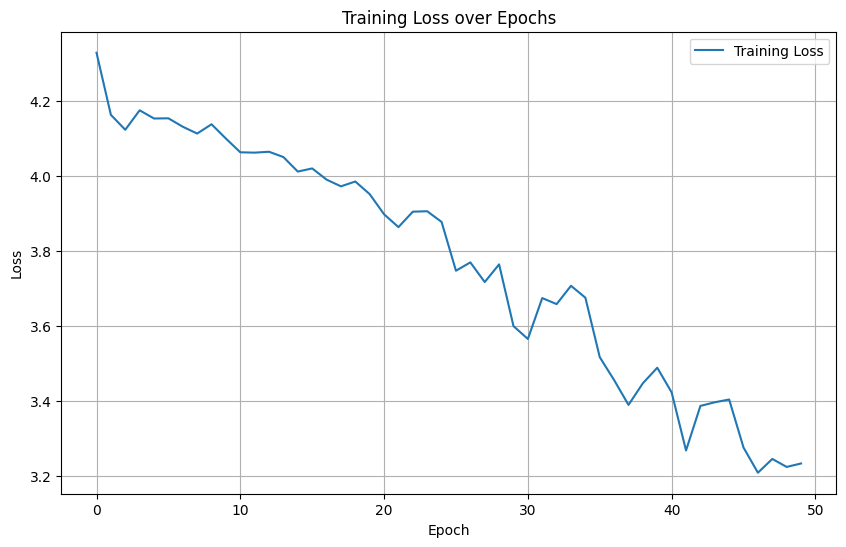

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

----

In [79]:
def compute_similarity_scores(model, data_loader):
    similarities = []
    labels = []
    
    for (acc_batch, gyro_batch), batch_labels in data_loader:
        # get embeddings
        _, (e_accel, e_gyro) = model(acc_batch, gyro_batch, return_feat=True, training=False) 
        # get embedding of accel and gyro
        
        # calculate cosine similarity between paired embeddings
        batch_similarities = tf.reduce_sum(tf.multiply(e_accel, e_gyro), axis=1)
        
        similarities.extend(batch_similarities.numpy())
        labels.extend(batch_labels.numpy())
    
    return np.array(similarities), np.array(labels)

In [82]:
normal_similarities = []
for (acc_batch, gyro_batch), _ in tqdm(train_dataset, desc='Computing normal similarities'):
    _, (e_accel, e_gyro) = model(acc_batch, gyro_batch, return_feat=True, training=False)
    sim = tf.reduce_sum(tf.multiply(e_accel, e_gyro), axis=1)
    normal_similarities.extend(sim.numpy())

test_similarities = []
test_pred_labels = []
for (acc_batch, gyro_batch), labels in tqdm(test_dataset, desc='Computing test similarities'):
    _, (e_accel, e_gyro) = model(acc_batch, gyro_batch, return_feat=True, training=False)
    sim = tf.reduce_sum(tf.multiply(e_accel, e_gyro), axis=1)
    test_similarities.extend(sim.numpy())
    test_pred_labels.extend(labels.numpy())

Computing test similarities: 100%|██████████████| 54/54 [00:04<00:00, 12.39it/s]


In [84]:
def calculate_similarities(model, test_dataset):
    normal_similarities = []
    fall_similarities = []
    
    for (acc_batch, gyro_batch), labels in test_dataset:
        _, (e_accel, e_gyro) = model(acc_batch, gyro_batch, return_feat=True, training=False)
        
        sim = tf.reduce_sum(tf.multiply(e_accel, e_gyro), axis=1)
        
        for sim_score, label in zip(sim.numpy(), labels.numpy()):
            if label == 0:  # normal
                normal_similarities.append(sim_score)
            else:  # fall
                fall_similarities.append(sim_score)
    
    return np.array(normal_similarities), np.array(fall_similarities)

normal_sims, fall_sims = calculate_similarities(model, test_dataset)

print("[ ADL data ]")
print(f"  Mean: {np.mean(normal_sims):.4f}")
print(f"  Std: {np.std(normal_sims):.4f}")
print(f"  Min: {np.min(normal_sims):.4f}")
print(f"  Max: {np.max(normal_sims):.4f}")
for i in range (20) :
    print ('ADL ind', i+1, ':', normal_sims[i])

print ()
print("[ FALL data ]")
print(f"  Mean: {np.mean(fall_sims):.4f}")
print(f"  Std: {np.std(fall_sims):.4f}")
print(f"  Min: {np.min(fall_sims):.4f}")
print(f"  Max: {np.max(fall_sims):.4f}")
for i in range (20) :
    print ('FALL ind', i+1, ':', fall_sims[i])

[ ADL data ]
  Mean: 0.5166
  Std: 0.4577
  Min: -0.6495
  Max: 0.9784
ADL ind 1 : 0.2703704
ADL ind 2 : 0.23840813
ADL ind 3 : 0.19850215
ADL ind 4 : 0.20198438
ADL ind 5 : 0.20880786
ADL ind 6 : 0.2216835
ADL ind 7 : 0.24441774
ADL ind 8 : 0.2555759
ADL ind 9 : 0.254276
ADL ind 10 : 0.26547897
ADL ind 11 : 0.29270428
ADL ind 12 : 0.26811075
ADL ind 13 : 0.22185549
ADL ind 14 : 0.2563037
ADL ind 15 : 0.22707726
ADL ind 16 : 0.24829464
ADL ind 17 : 0.255745
ADL ind 18 : 0.25828627
ADL ind 19 : 0.2843294
ADL ind 20 : 0.24035582

[ FALL data ]
  Mean: 0.4672
  Std: 0.5765
  Min: -0.4716
  Max: 0.9798
FALL ind 1 : 0.87831354
FALL ind 2 : 0.81224304
FALL ind 3 : 0.7778419
FALL ind 4 : 0.7558639
FALL ind 5 : 0.72648656
FALL ind 6 : 0.57363105
FALL ind 7 : 0.41686273
FALL ind 8 : 0.2775564
FALL ind 9 : 0.23706943
FALL ind 10 : 0.47226155
FALL ind 11 : 0.46688217
FALL ind 12 : 0.6441959
FALL ind 13 : 0.5605023
FALL ind 14 : 0.61002624
FALL ind 15 : 0.60053873
FALL ind 16 : 0.7385618
FALL ind 

2025-02-05 14:46:02.524272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [85]:
threshold = np.percentile(normal_similarities, 10)

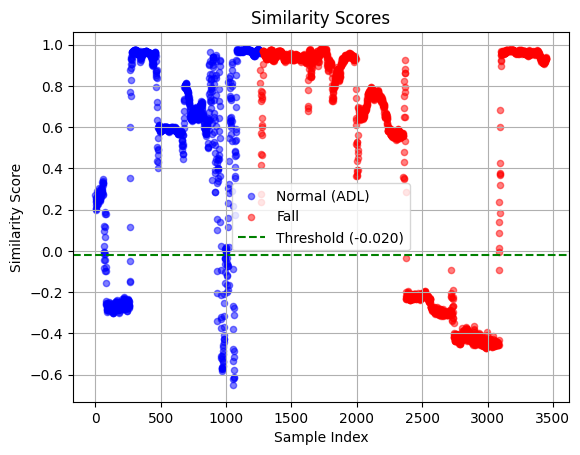

In [86]:
indices = range(len(test_similarities))
plt.scatter([i for i, l in zip(indices, test_pred_labels) if l == 0], 
           [s for s, l in zip(test_similarities, test_pred_labels) if l == 0],
           c='blue', label='Normal (ADL)', alpha=0.5, s=20)
plt.scatter([i for i, l in zip(indices, test_pred_labels) if l == 1],
           [s for s, l in zip(test_similarities, test_pred_labels) if l == 1],
           c='red', label='Fall', alpha=0.5, s=20)
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold ({threshold:.3f})')
# plt.ylim(0.0078100, 0.0078150)
plt.xlabel('Sample Index')
plt.ylabel('Similarity Score')
plt.title('Similarity Scores')
plt.legend()
plt.grid(True)

In [87]:
predictions = [1 if sim < threshold else 0 for sim in test_similarities] 
true_labels = test_pred_labels

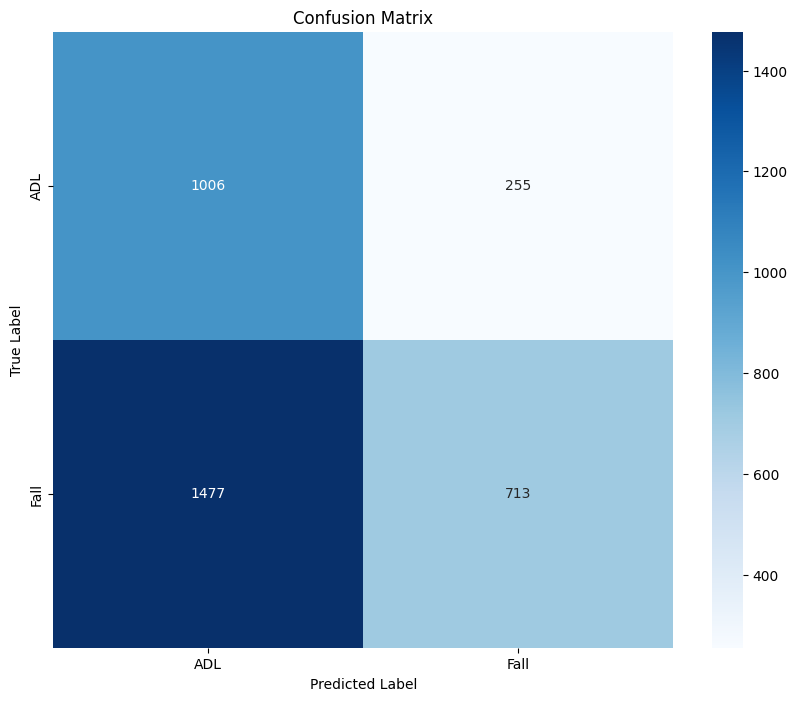

In [88]:
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
labels = ['ADL', 'Fall']
plt.xticks([0.5, 1.5], labels)
plt.yticks([0.5, 1.5], labels)
plt.show()

In [89]:
print ("classification report")
print(classification_report(true_labels, predictions, 
                          target_names=['ADL', 'Fall']))

classification report
              precision    recall  f1-score   support

         ADL       0.41      0.80      0.54      1261
        Fall       0.74      0.33      0.45      2190

    accuracy                           0.50      3451
   macro avg       0.57      0.56      0.49      3451
weighted avg       0.62      0.50      0.48      3451

